# Abalone

[The documentation](https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset/data) is complete and informative. One interesting observation is that the sex field can have 3 values, namely male, female and infant.

In [30]:
import pandas as pd
import seaborn as sns
import os
from data import load_dataset
import plotter

## Preliminary analysis

In [31]:
abalone = load_dataset("abalone")
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [32]:
abalone.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [33]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [34]:
abalone.shape

(4177, 9)

In [35]:
abalone.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [36]:
abalone[abalone.duplicated()].shape

(0, 9)

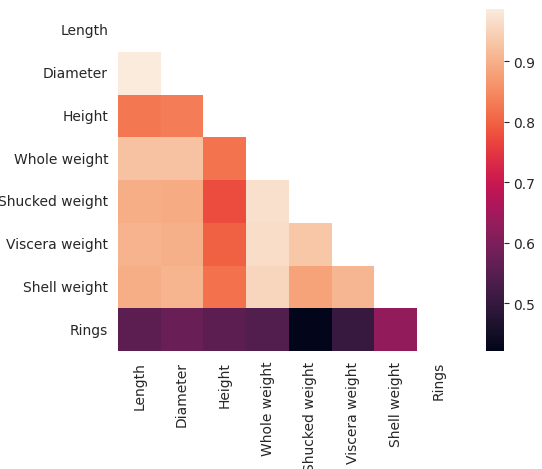

In [37]:
plotter.corr(abalone.corr(numeric_only=True))

All numerical features are positively correlated with one another. This may present an opportunity to do some feature selection. Unfortunately, there are no particular features that are strongly correlated to rings. In other words, we may need to perform feature engineering to aid the model to learn better.

## Distributional analysis

<Axes: xlabel='Rings', ylabel='Count'>

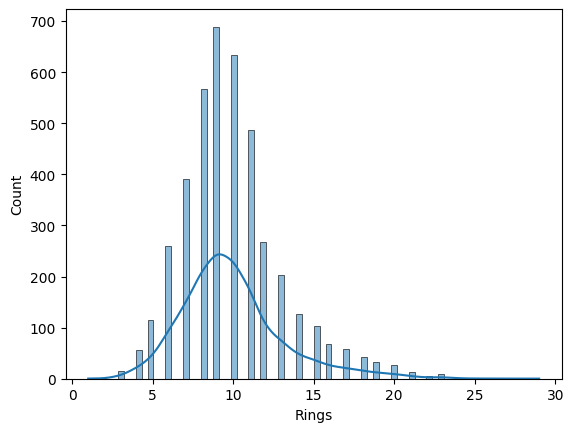

In [39]:
sns.histplot(data=abalone, x="Rings", kde=True)

## Relational analysis

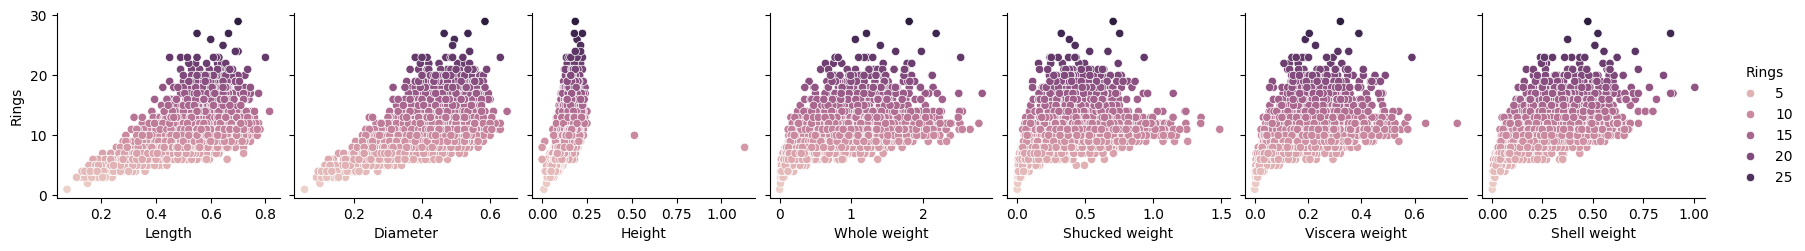

In [44]:
numerical_features = abalone.columns.to_list()
numerical_features.remove("Sex")
numerical_features.remove("Rings")

sns.pairplot(data=abalone, x_vars=numerical_features, y_vars=["Rings"], hue="Rings")

We observe that abalones with a larger diameter and height, generally have a higher number of rings. The number of rings seems to be evenly distributed across the remaining features. We can study this relationship better using a lineplot.

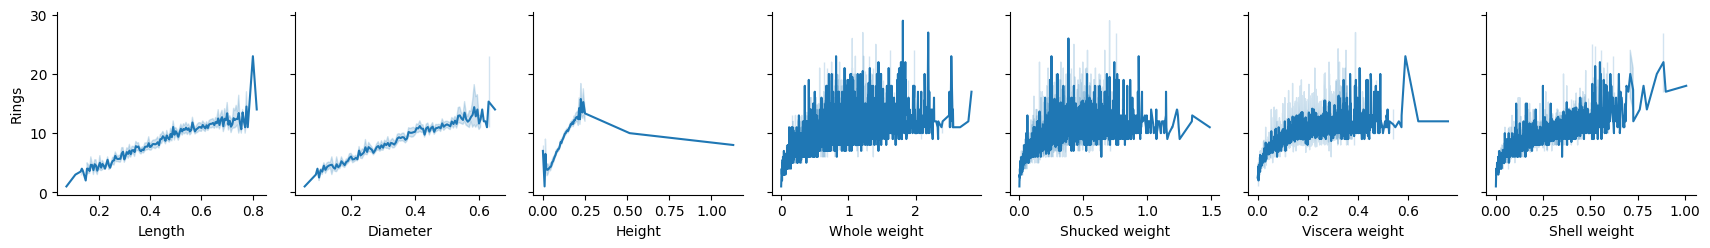

In [45]:
g = sns.PairGrid(data=abalone, x_vars=numerical_features, y_vars=["Rings"])
g.map(sns.lineplot)

The linear relationship between diameter and height with ring is obvious form the lineplot. We also check the pairwise relationships between each feature next.

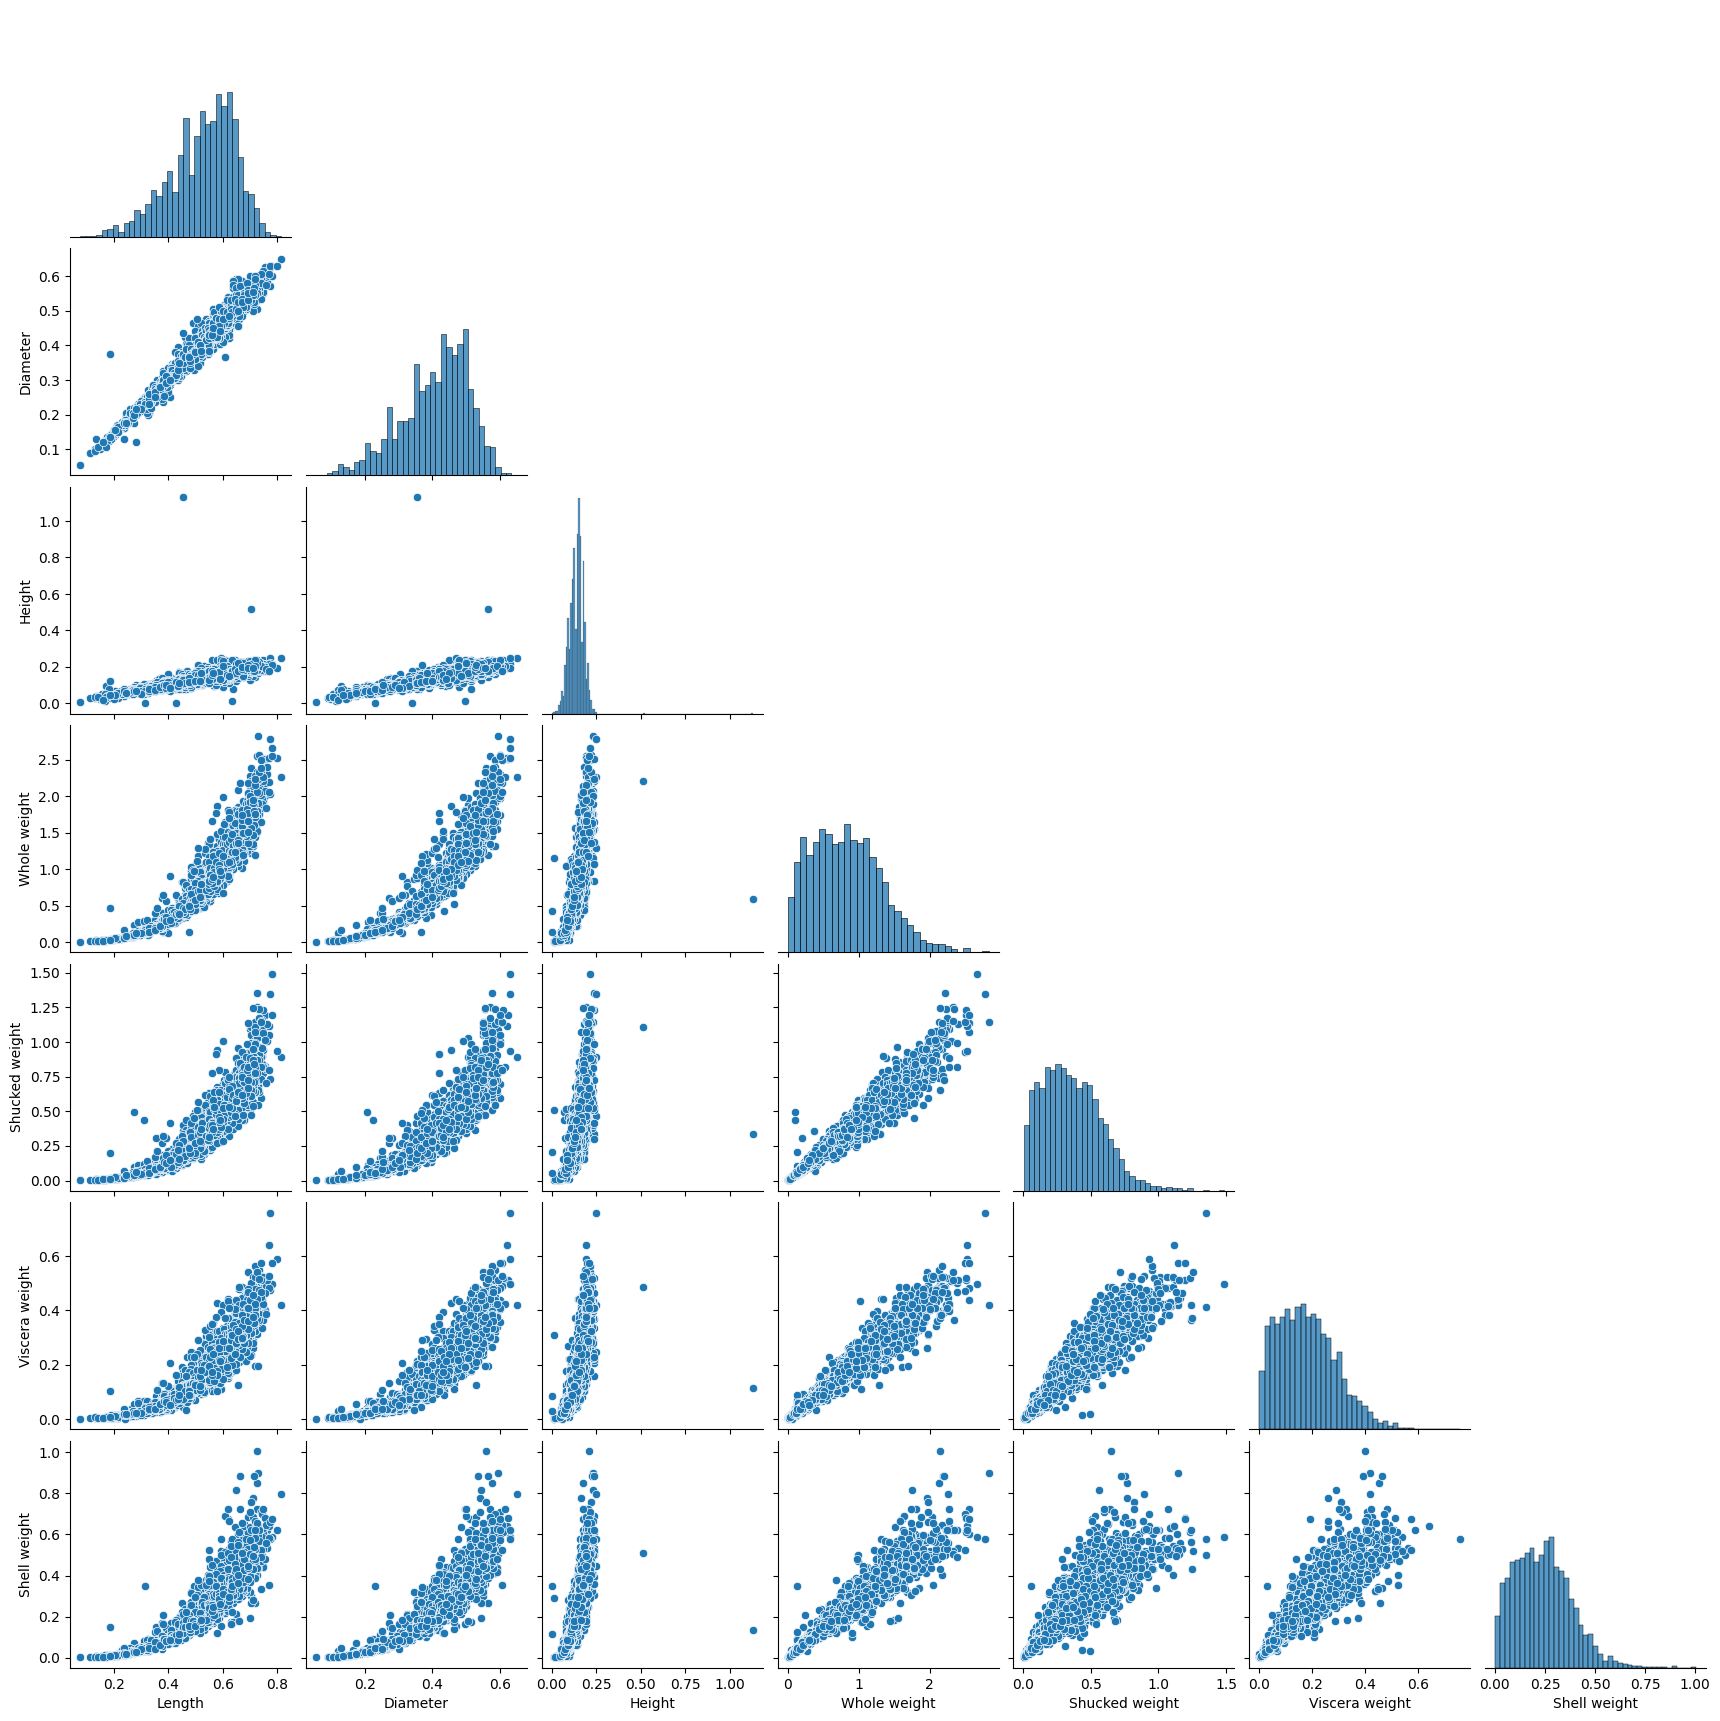

In [46]:
sns.pairplot(data=abalone, vars=numerical_features, corner=True)

All numerical features are linearly related to one another.

## Categorical analysis

We have one categorical feature in the dataset namely sex. Let's condition rings on sex to see if the number of rings vary across the sexes.

<Axes: xlabel='Rings', ylabel='Count'>

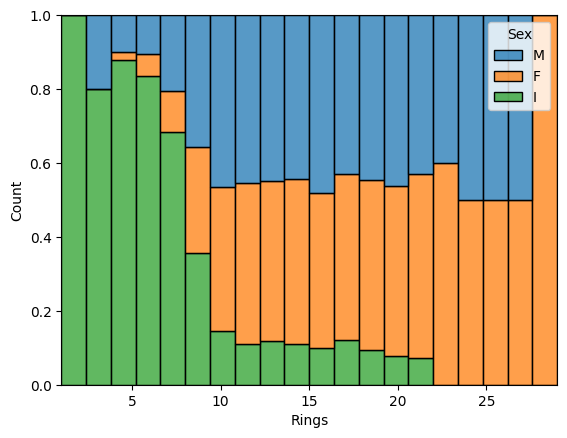

In [47]:
sns.histplot(data=abalone, x="Rings", hue="Sex", bins=20, multiple="fill")

We observe similar distribution for the male and female sexes. Infants primarily have lower number of rings.